# Probit Maximum Likelihood

In this homework you should implement the maximum likelihood estimator for the probit model. To remind you, this model is defined as follows:
    $$
    \begin{align}  
    y_i  &\in \{0,1\} \\
    \Pr\{y_i=1\} &= \Phi(x_i \beta) \\
    L(\beta)   & = \Pi_{i=1}^N  \Phi(x_i \beta)^{y_i} (1-\Phi(x_i \beta))^{1-y_i} \\
    \beta  & \in \mathbb{R}^k \\
    x_i  & \sim N\left([0,0,0],\left[ \begin{array}{ccc} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1\end{array} \right] \right) \\
    k & = 3 
    \end{align}
    $$
    
Where $\Phi$ is the standard Normal cdf. Think of $x_i$ as a row-vector. You should proceed as follows:

1. define a data generating function with default argument `N=10000`, generating `N` simulated data points from this model. Generate the data using $\beta=[1,1.5,-0.5]$. The function should return a `Dict` as outlined in the code.
1. Define the log likelihood function, $l(\beta) = \log(L)$
1. Write a function `plotLike` to plot the log likelihood function for different parameter values. Follow the outline of that function.
1. Define the function `maximize_like`. this should optimize your log likelihood function.
1. (Optional) Define the gradient of the log likelihood function and use it in another optimization `maximize_ike_grad`.
1. (Optional) Define the hessian of the log likelihood function and use it in another optimization `maximize_like_grad_hess`.
1. (Optional) Use the hessian of the log likelihood function to compute the standard errors of your estimates and use it in `maximize_like_grad_se`

## Tests

* The code comes with a test suite that you should fill out. 
* There are some example tests, you should make those work and maybe add other ones. 
* Please do not change anything in the file structure.

In [1]:
using Distributions, Optim, Plots, DataFrames
pyplot()

# data generating function
function makeData(n=10000::Int, beta = [ 1; 1.5; -0.5 ]::Vector, k=3::Int)
    X = rand(MvNormal(eye(k)),n) # define X
    y = Array{Int}(n) #empty y
    for i in 1:n # define binomial y
        y[i] = rand(Bernoulli(cdf(Normal(),dot(X[:,i]',beta))))
    end
    # return a dict with beta,numobs,X,y,norm)
    return Dict("beta" => beta, "numobs" => n, "X" => X, "y" => y, "dist" => Normal())
    #return beta, X, y
end

INFO: Recompiling stale cache file /home/opmc/.julia/lib/v0.5/Distributions.ji for module Distributions.
INFO: Recompiling stale cache file /home/opmc/.julia/lib/v0.5/Calculus.ji for module Calculus.
INFO: Recompiling stale cache file /home/opmc/.julia/lib/v0.5/Optim.ji for module Optim.
INFO: Recompiling stale cache file /home/opmc/.julia/lib/v0.5/Plots.ji for module Plots.
INFO: Recompiling stale cache file /home/opmc/.julia/lib/v0.5/DataArrays.ji for module DataArrays.
INFO: Recompiling stale cache file /home/opmc/.julia/lib/v0.5/DataFrames.ji for module DataFrames.
INFO: Recompiling stale cache file /home/opmc/.julia/lib/v0.5/PyPlot.ji for module PyPlot.



 If the code has a Segmentation fault error switch to qt v4.8.5 by pasting the following code into julia: 
 
if !Plots.is_installed("PyPlot")
    Pkg.add("PyPlot")
end
withenv("PYTHON" => "") do
    Pkg.build("PyPlot")
end
import Conda
Conda.add("qt=4.8.5")

# now restart julia!


makeData (generic function with 4 methods)

In [26]:
d = makeData()

Dict{String,Any} with 5 entries:
  "y"      => [1,0,0,0,1,0,0,1,1,0  …  1,1,1,0,0,0,0,1,0,0]
  "X"      => [-0.144947 -0.409593 … 0.0388513 0.432134; -0.114392 -1.33659 … -…
  "numobs" => 10000
  "dist"   => Distributions.Normal{Float64}(μ=0.0, σ=1.0)
  "beta"   => [1.0,1.5,-0.5]

In [37]:
function loglik(beta::Vector, d::Dict)
    l = sum(d["y"][i]*log(cdf(d["dist"],dot(d["X"][:,i]',beta)))+(1-d["y"][i])*log(1-cdf(d["dist"],dot(d["X"][:,i]',beta))) for i in 1:d["numobs"])
    return l
end
loglik(d["beta"], d)

-3336.3129150403115

In [17]:
function plotLike()
    d = makeData()
    l1(x) = loglik([ x, d["beta"][2], d["beta"][3] ], d)
    l2(x) = loglik([ d["beta"][1], x, d["beta"][3] ], d)
    l3(x) = loglik([ d["beta"][1], d["beta"][2], x ], d)
    #x1 = linspace(0, 1, 100)
    plot1 = plot(linspace(0,2,100), l1)
    plot2 = plot(linspace(.5,2.5,100), l2)
    plot3 = plot(linspace(-1,0,100), l3)
    return plot(plot1, plot2, plot3)
end

plotLike (generic function with 1 method)


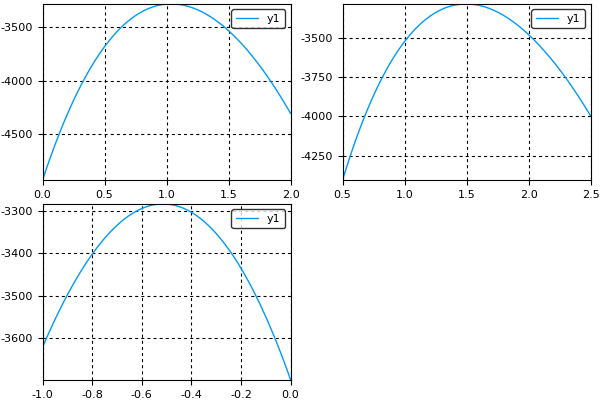

In [18]:
plotLike()

In [19]:
function maximize_like(x0=[0.8,1.0,-0.1],meth=NelderMead())
    d = makeData
    l(beta) = loglik(beta, d)
    optimize(l(beta),x0)
end

maximize_like (generic function with 3 methods)

In [20]:
d = makeData
l(beta) = loglik(beta, d)
optimize(l(beta),x0)

LoadError: MethodError: no method matching loglik(::Base.Math.#beta, ::#makeData)